<a href="https://colab.research.google.com/github/Akash1347/Laptop-Price-Prediction/blob/main/Copy_of_Laptop_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
data = pd.read_csv('laptop_price.csv', encoding='latin-1')

In [167]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [168]:
data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [169]:
data.sum().notnull()

,0
laptop_ID,True
Company,True
Product,True
TypeName,True
Inches,True
ScreenResolution,True
Cpu,True
Ram,True
Memory,True
Gpu,True


In [170]:
data.shape

(1303, 13)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [172]:
data = data.drop(columns=['laptop_ID'])

In [173]:
def extract_speed(text):
  parts = text.split()
  for part in parts:
    if 'GHz' in part:
      return part
  return None
data['speed_GHz'] = data['Cpu'].apply(extract_speed)
data['speed_GHz'] = data['speed_GHz'].str.replace('GHz' , '').astype('float32')

In [174]:
def extract_text(text):
  parts = text.split()
  parts.pop()
  return ' '.join(parts)
data['processor'] = data['Cpu'].apply(extract_text)
data.drop(columns = 'Cpu' ,inplace=True)

In [175]:
data['Ram'] = data['Ram'].str.replace('GB' , '').astype('int32')
data['Weight'] = data['Weight'].str.replace('kg' , '').astype('float32')

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  speed_GHz         1303 non-null   float32
 12  processor         1303 non-null   object 
dtypes: float32(2), float64(2), int32(1), object(8)
memory usage: 117.2+ KB


In [177]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,speed_GHz,processor
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel Core i5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel Core i5 7200U
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel Core i5


In [178]:
def screenSize(text):
  parts = text.split()
  screen = parts[-1]
  return screen
data['screen_size'] = data['ScreenResolution'].apply(screenSize)

data[['screen_width' ,'screen_length']] = data['screen_size'].str.split('x' ,expand = True)
data['screen_length'] = data['screen_length'].astype('int32')
data['screen_width'] = data['screen_width'].astype('int32')
data.drop(columns='screen_size' ,inplace = True)




In [179]:
data['ScreenResolution'] = data['ScreenResolution'].apply(extract_text)

In [180]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,speed_GHz,processor,screen_width,screen_length
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel Core i5,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel Core i5,1440,900
2,HP,250 G6,Notebook,15.6,Full HD,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel Core i5 7200U,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel Core i7,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel Core i5,2560,1600


<Axes: xlabel='Company'>

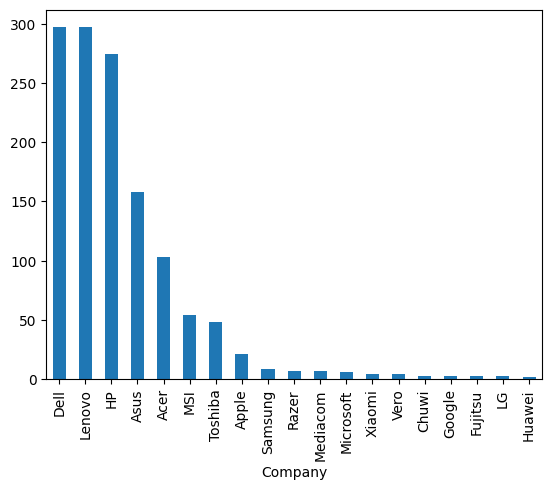

In [181]:
data['Company'].value_counts().plot(kind = 'bar')

<Axes: xlabel='OpSys'>

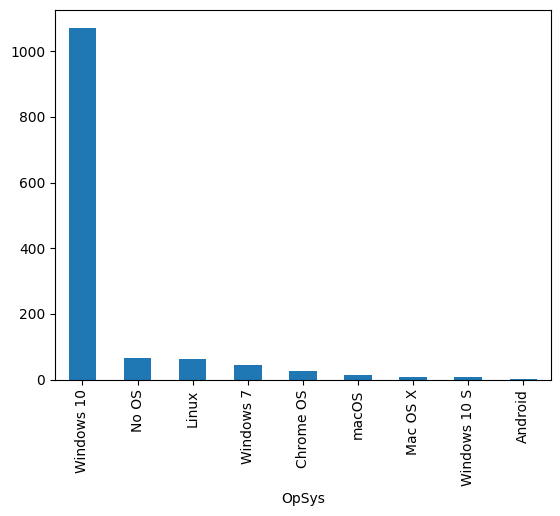

In [182]:
data['OpSys'].value_counts().plot(kind = 'bar')

<Axes: xlabel='TypeName'>

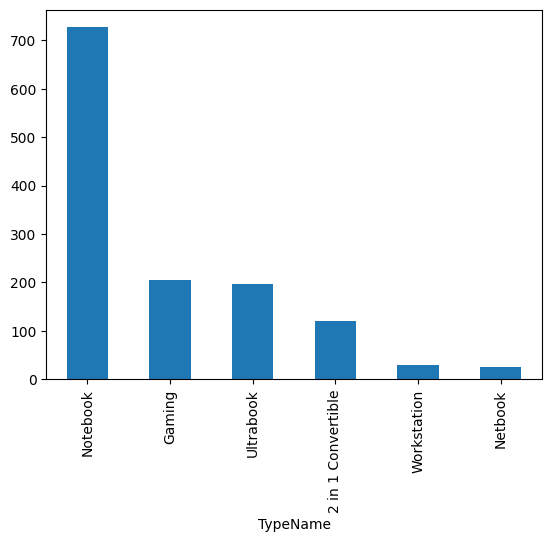

In [183]:
data['TypeName'].value_counts().plot(kind = 'bar')

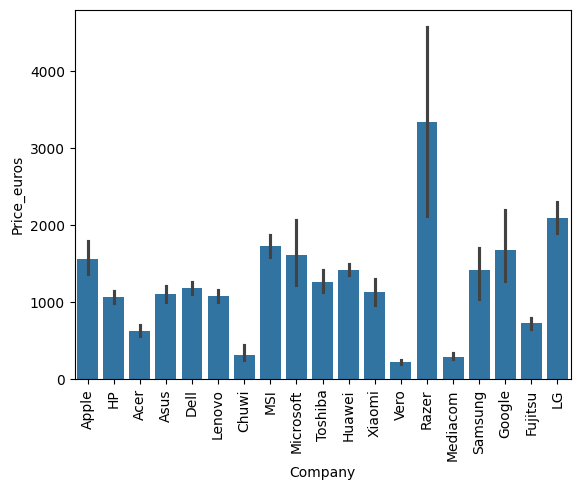

In [184]:
import seaborn as sns
sns.barplot(x = data['Company'] ,y = data['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

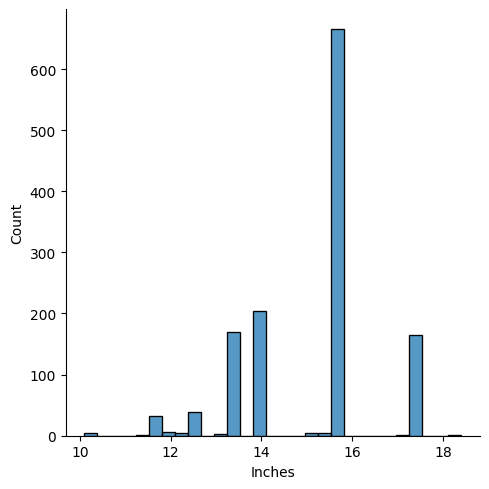

In [185]:
sns.displot(data['Inches'])

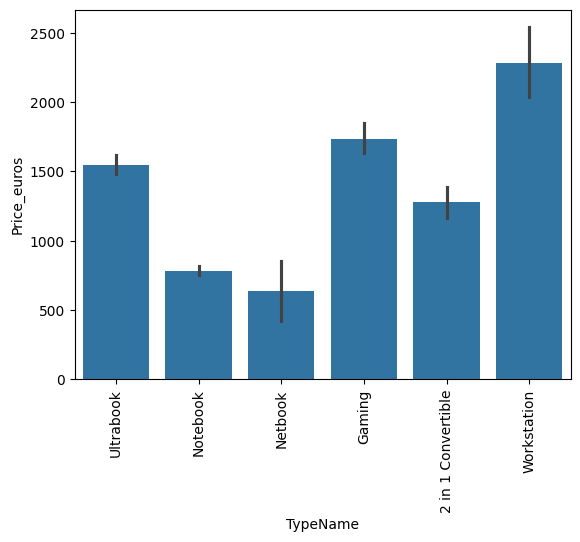

In [186]:
import seaborn as sns
sns.barplot(x = data['TypeName'] ,y = data['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [187]:
data.notnull().sum()

,0
Company,1303
Product,1303
TypeName,1303
Inches,1303
ScreenResolution,1303
Ram,1303
Memory,1303
Gpu,1303
OpSys,1303
Weight,1303


In [188]:
data['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD,507
,314
IPS Panel Full HD,235
IPS Panel Full HD / Touchscreen,53
Full HD / Touchscreen,47
Touchscreen,32
IPS Panel Retina Display,17
Quad HD+ / Touchscreen,15
IPS Panel Touchscreen,13


In [189]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Ips panel'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data['Full HD'] = data['ScreenResolution'].apply(lambda x:1 if 'Full HD' in x else 0)
data['4K Ultra HD'] = data['ScreenResolution'].apply(lambda x:1 if '4K Ultra HD' in x else 0)
data.drop(columns = 'ScreenResolution' ,inplace = True)


In [190]:
data['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [191]:
data['Memory'] = data['Memory'].apply(lambda x :'1024GB' if '1TB' in x else x) #replace 1tb into 1024 gb
data['Memory'] = data['Memory'].apply(lambda x :'2048GB' if '2TB' in x else x) #replace 2tb into 2048 gb
data[['primary' , 'secondary']] = data['Memory'].str.split('+' ,expand = True)

data['secondary'] = data['secondary'].fillna('')

data['SSD_primary'] = data['primary'].apply(lambda x: 1 if 'SSD' in x else 0)
data['HHD_primary'] = data['primary'].apply(lambda x : 1 if 'HHD' in x else 0)
data['Flash Storage_primary'] = data['primary'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
#data['Hybrid_primary'] = data['primary'].apply(lambda x : 1 if 'Hybrid' in x else 0)

data['SSD_secondary'] = data['secondary'].apply(lambda x: 1 if 'SSD' in x else 0)
data['HHD_secondary'] = data['secondary'].apply(lambda x : 1 if 'HHD' in x else 0)
data['Flash Storage_secondary'] = data['secondary'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
#data['Hybrid_secondary'] = data['secondary'].apply(lambda x : 1 if 'Hybrid' in x else 0)

data.drop(columns = ['Memory' ,'primary' , 'secondary'] ,inplace = True)





In [192]:
data.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,speed_GHz,...,Touchscreen,Ips panel,Full HD,4K Ultra HD,SSD_primary,HHD_primary,Flash Storage_primary,SSD_secondary,HHD_secondary,Flash Storage_secondary
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,...,0,1,0,0,1,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,...,0,0,0,0,0,0,1,0,0,0
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,2.5,...,0,0,1,0,1,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,...,0,1,0,0,1,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,...,0,1,0,0,1,0,0,0,0,0


In [193]:
data['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


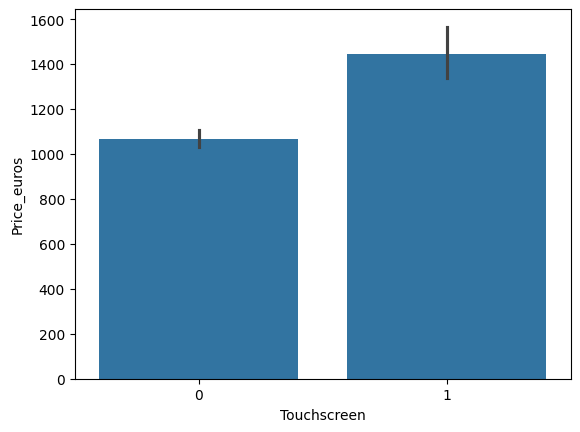

In [194]:
sns.barplot(x = data['Touchscreen'] ,y = data['Price_euros'])
plt.show()

In [195]:
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data['Gpu_brand'].value_counts()
data.drop(columns = 'Gpu' ,inplace = True)


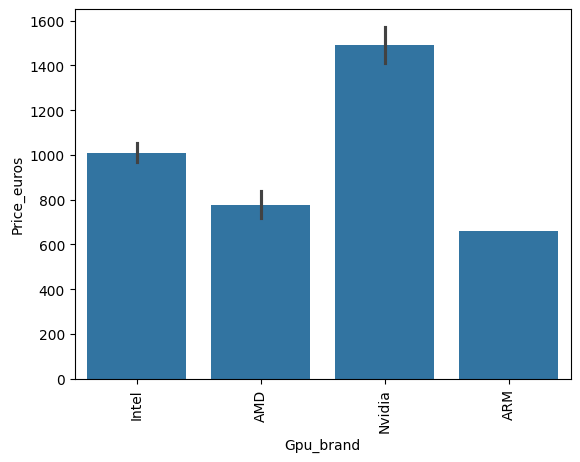

In [196]:
sns.barplot(x = data['Gpu_brand'] ,y = data['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [197]:
data['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [198]:
def cat_os(text):
  if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
    return 'Windows'
  elif text == 'macOS' or text == 'Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns = 'OpSys' ,inplace = True)

In [199]:
data.head()

,Company,Product,TypeName,Inches,Ram,Weight,Price_euros,speed_GHz,processor,screen_width,...,Full HD,4K Ultra HD,SSD_primary,HHD_primary,Flash Storage_primary,SSD_secondary,HHD_secondary,Flash Storage_secondary,Gpu_brand,os
0,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1339.69,2.3,Intel Core i5,2560,...,0,0,1,0,0,0,0,0,Intel,Mac
1,Apple,Macbook Air,Ultrabook,13.3,8,1.34,898.94,1.8,Intel Core i5,1440,...,0,0,0,0,1,0,0,0,Intel,Mac
2,HP,250 G6,Notebook,15.6,8,1.86,575.00,2.5,Intel Core i5 7200U,1920,...,1,0,1,0,0,0,0,0,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,15.4,16,1.83,2537.45,2.7,Intel Core i7,2880,...,0,0,1,0,0,0,0,0,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1803.60,3.1,Intel Core i5,2560,...,0,0,1,0,0,0,0,0,Intel,Mac


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Ram                      1303 non-null   int32  
 5   Weight                   1303 non-null   float32
 6   Price_euros              1303 non-null   float64
 7   speed_GHz                1303 non-null   float32
 8   processor                1303 non-null   object 
 9   screen_width             1303 non-null   int32  
 10  screen_length            1303 non-null   int32  
 11  Touchscreen              1303 non-null   int64  
 12  Ips panel                1303 non-null   int64  
 13  Full HD                  1303 non-null   int64  
 14  4K Ultra HD             

In [201]:
data.head()

,Company,Product,TypeName,Inches,Ram,Weight,Price_euros,speed_GHz,processor,screen_width,...,Full HD,4K Ultra HD,SSD_primary,HHD_primary,Flash Storage_primary,SSD_secondary,HHD_secondary,Flash Storage_secondary,Gpu_brand,os
0,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1339.69,2.3,Intel Core i5,2560,...,0,0,1,0,0,0,0,0,Intel,Mac
1,Apple,Macbook Air,Ultrabook,13.3,8,1.34,898.94,1.8,Intel Core i5,1440,...,0,0,0,0,1,0,0,0,Intel,Mac
2,HP,250 G6,Notebook,15.6,8,1.86,575.00,2.5,Intel Core i5 7200U,1920,...,1,0,1,0,0,0,0,0,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,15.4,16,1.83,2537.45,2.7,Intel Core i7,2880,...,0,0,1,0,0,0,0,0,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,13.3,8,1.37,1803.60,3.1,Intel Core i5,2560,...,0,0,1,0,0,0,0,0,Intel,Mac


<ipython-input-202-e1ef85f2cf3d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

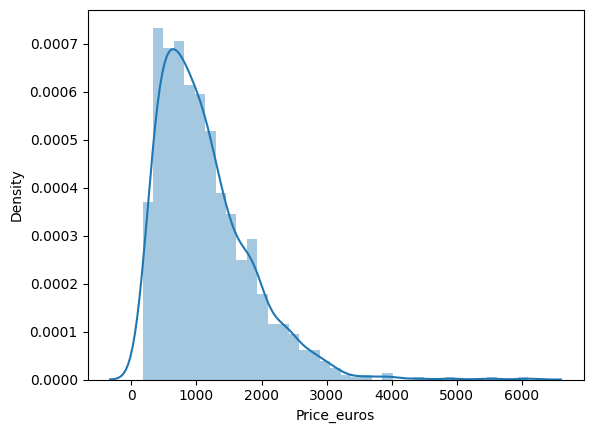

In [202]:
sns.distplot(data['Price_euros'])

<ipython-input-203-bd56e9f82778>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price_euros']))


<Axes: xlabel='Price_euros', ylabel='Density'>

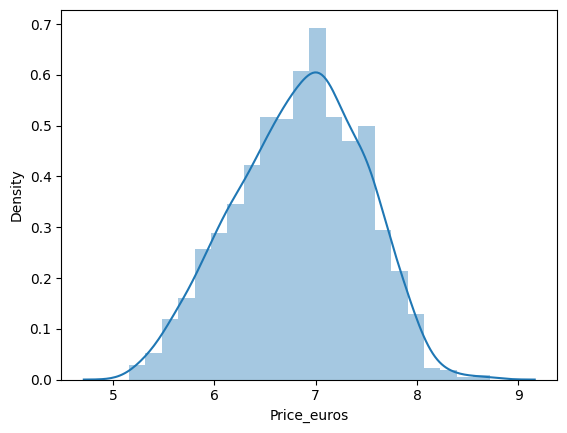

In [203]:
import numpy as np
sns.distplot(np.log(data['Price_euros']))


In [204]:
data.drop(columns = 'Product' ,inplace = True)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   TypeName                 1303 non-null   object 
 2   Inches                   1303 non-null   float64
 3   Ram                      1303 non-null   int32  
 4   Weight                   1303 non-null   float32
 5   Price_euros              1303 non-null   float64
 6   speed_GHz                1303 non-null   float32
 7   processor                1303 non-null   object 
 8   screen_width             1303 non-null   int32  
 9   screen_length            1303 non-null   int32  
 10  Touchscreen              1303 non-null   int64  
 11  Ips panel                1303 non-null   int64  
 12  Full HD                  1303 non-null   int64  
 13  4K Ultra HD              1303 non-null   int64  
 14  SSD_primary             

In [206]:
data.head(1)

,Company,TypeName,Inches,Ram,Weight,Price_euros,speed_GHz,processor,screen_width,screen_length,...,Full HD,4K Ultra HD,SSD_primary,HHD_primary,Flash Storage_primary,SSD_secondary,HHD_secondary,Flash Storage_secondary,Gpu_brand,os
0,Apple,Ultrabook,13.3,8,1.37,1339.69,2.3,Intel Core i5,2560,1600,...,0,0,1,0,0,0,0,0,Intel,Mac


In [207]:
data['Company'].value_counts()

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [208]:
columns_to_encode =[col for col in data.columns if col != 'Price_euros']
columns_to_encode

['Company',
 'TypeName',
 'Inches',
 'Ram',
 'Weight',
 'speed_GHz',
 'processor',
 'screen_width',
 'screen_length',
 'Touchscreen',
 'Ips panel',
 'Full HD',
 '4K Ultra HD',
 'SSD_primary',
 'HHD_primary',
 'Flash Storage_primary',
 'SSD_secondary',
 'HHD_secondary',
 'Flash Storage_secondary',
 'Gpu_brand',
 'os']

In [209]:
one_hot_encoded = pd.get_dummies(data["Company"], prefix="Brand")

# Combine the original data with the one-hot encoded columns
result_df = pd.concat([data, one_hot_encoded], axis=1)
result_df.head()

,Company,TypeName,Inches,Ram,Weight,Price_euros,speed_GHz,processor,screen_width,screen_length,...,Brand_LG,Brand_Lenovo,Brand_MSI,Brand_Mediacom,Brand_Microsoft,Brand_Razer,Brand_Samsung,Brand_Toshiba,Brand_Vero,Brand_Xiaomi
0,Apple,Ultrabook,13.3,8,1.37,1339.69,2.3,Intel Core i5,2560,1600,...,False,False,False,False,False,False,False,False,False,False
1,Apple,Ultrabook,13.3,8,1.34,898.94,1.8,Intel Core i5,1440,900,...,False,False,False,False,False,False,False,False,False,False
2,HP,Notebook,15.6,8,1.86,575.00,2.5,Intel Core i5 7200U,1920,1080,...,False,False,False,False,False,False,False,False,False,False
3,Apple,Ultrabook,15.4,16,1.83,2537.45,2.7,Intel Core i7,2880,1800,...,False,False,False,False,False,False,False,False,False,False
4,Apple,Ultrabook,13.3,8,1.37,1803.60,3.1,Intel Core i5,2560,1600,...,False,False,False,False,False,False,False,False,False,False


In [210]:
data = pd.get_dummies(data, columns=['Company','TypeName','processor','os' ,'Gpu_brand'], drop_first=True)



In [211]:
result_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   TypeName                 1303 non-null   object 
 2   Inches                   1303 non-null   float64
 3   Ram                      1303 non-null   int32  
 4   Weight                   1303 non-null   float32
 5   Price_euros              1303 non-null   float64
 6   speed_GHz                1303 non-null   float32
 7   processor                1303 non-null   object 
 8   screen_width             1303 non-null   int32  
 9   screen_length            1303 non-null   int32  
 10  Touchscreen              1303 non-null   int64  
 11  Ips panel                1303 non-null   int64  
 12  Full HD                  1303 non-null   int64  
 13  4K Ultra HD              1303 non-null   int64  
 14  SSD_primary             

In [212]:
data.head()

,Inches,Ram,Weight,Price_euros,speed_GHz,screen_width,screen_length,Touchscreen,Ips panel,Full HD,...,processor_Intel Pentium Quad Core N4200,processor_Intel Xeon E3-1505M V6,processor_Intel Xeon E3-1535M v5,processor_Intel Xeon E3-1535M v6,processor_Samsung Cortex A72&A53,os_Others/No OS/Linux,os_Windows,Gpu_brand_ARM,Gpu_brand_Intel,Gpu_brand_Nvidia
0,13.3,8,1.37,1339.69,2.3,2560,1600,0,1,0,...,False,False,False,False,False,False,False,False,True,False
1,13.3,8,1.34,898.94,1.8,1440,900,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,15.6,8,1.86,575.00,2.5,1920,1080,0,0,1,...,False,False,False,False,False,True,False,False,True,False
3,15.4,16,1.83,2537.45,2.7,2880,1800,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,1803.60,3.1,2560,1600,0,1,0,...,False,False,False,False,False,False,False,False,True,False


In [213]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [215]:
x = data.drop(columns = 'Price_euros')
y = np.log(data['Price_euros'])

In [216]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.3 , random_state = 42)

In [217]:
from sklearn.metrics import r2_score ,mean_squared_error
le = LinearRegression()
le.fit(x_train ,y_train)
y_pred = le.predict(x_test)

print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))

R2 score : 0.8392689830788688
MSE : 0.06008565409439159


In [218]:
from sklearn.linear_model import Lasso , Ridge
riged = Ridge()
riged.fit(x_train ,y_train)
y_pred = riged.predict(x_test)

print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))
#

R2 score : 0.8349743220888509
MSE : 0.06169111593767422


In [219]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train ,y_train)
y_pred = lasso.predict(x_test)

print("R2 score :",r2_score(y_test ,y_pred))

R2 score : 0.7975446961120131


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.422e+01, tolerance: 3.599e-02
  model = cd_fast.enet_coordinate_descent(


In [220]:
kneighbors = KNeighborsRegressor(n_neighbors=3)
kneighbors.fit(x_train ,y_train)
y_pred = kneighbors.predict(x_test)

print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))

R2 score : 0.8019839875942094
MSE : 0.07402380607349265


In [221]:
decision_tree = DecisionTreeRegressor(max_depth = 8)
decision_tree.fit(x_train ,y_train)
y_pred = decision_tree.predict(x_test)

print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))

R2 score : 0.7821555119946562
MSE : 0.08143623305190498


In [222]:
svm = SVR(kernel ='rbf' ,C = 10000 ,epsilon = 0.1)
svm.fit(x_train ,y_train)
y_pred = svm.predict(x_test)
print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))

R2 score : 0.7251655190853608
MSE : 0.10274065248745183


In [223]:
random = RandomForestRegressor(n_estimators = 100 ,random_state =3 ,max_samples =0.5 ,max_features =0.75 ,max_depth = 15)
random.fit(x_train ,y_train)
y_pred = random.predict(x_test)

print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))
#

R2 score : 0.8563096767528419
MSE : 0.0537153763145574


In [224]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree = ExtraTreesRegressor(n_estimators = 100 ,random_state =3 ,max_samples =0.5 ,max_features =0.75 ,max_depth = 15 ,bootstrap= True)
extra_tree.fit(x_train ,y_train)
y_pred = extra_tree.predict(x_test)

print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))
#

R2 score : 0.8517883984901028
MSE : 0.05540555389797138


In [225]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(n_estimators = 15 ,random_state =3 ,learning_rate = 2.5)
adaboost.fit(x_train ,y_train)
y_pred = adaboost.predict(x_test)

print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))
#

R2 score : 0.8016565170533361
MSE : 0.07414622352609095


In [226]:
gradientboost = GradientBoostingRegressor(n_estimators = 500 ,random_state =3 ,learning_rate = 0.1)
gradientboost.fit(x_train ,y_train)
y_pred = gradientboost.predict(x_test)
print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))

R2 score : 0.8664583407504599
MSE : 0.04992152789524266


In [227]:
xgboost = XGBRegressor(n_estimators = 100 ,random_state =3 ,learning_rate = 0.1)
xgboost.fit(x_train ,y_train)
y_pred = xgboost.predict(x_test)
print("R2 score :",r2_score(y_test ,y_pred))
print("MSE :",mean_squared_error(y_test ,y_pred))
#

R2 score : 0.8532873028373261
MSE : 0.05484522242086744
